Step 1: Brief description of the problem and data

The goal of this project is to distinguish tweets that announce real disasters. It is related to Natural Language Processing (NLP) because it involves classifying tweet texts to identify whether they describe a real disaster. We need to use machine learning  algorithms to distinguish tweets that announce actual disasters from those that don't. Natural Language Processing (NLP) is a branch of artificial intelligence (AI) that focuses on enabling machines to understand, interpret, process, and generate human language in a way that is meaningful and useful.

**Data Size** : 7613 entries in train.csv, 3263 entries in test.csv \
**Dimensions** :  **train.csv** : 7613 x 5   **test.csv** : 3263 x 4 \
**Structures** :  **train.csv** : Five columns- id, keyword (Nullable), location(Nullable), text, target   **test.csv** : Four columns - id, keyword (Nullable), location(Nullable), text

In [15]:
import pandas as pd

df_train = pd.read_csv("nlp-getting-started/train.csv")
df_test = pd.read_csv("nlp-getting-started/test.csv")

print('Training Set Shape = {}'.format(df_train.shape))
print('Test Set Shape = {}'.format(df_test.shape))

print(df_train.head())
print(df_test.head())

Training Set Shape = (7613, 5)
Test Set Shape = (3263, 4)
   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  
   id keyword location                                               text
0   0     NaN      NaN                 Just happened a terrible car crash
1   2     NaN      NaN  Heard about #earthquake is different cities, s...
2   3     NaN      NaN  there is a forest fire at spot pond, geese are...
3   9     NaN      NaN           Apocalypse lighting. #Spokane #wildfires
4  11     NaN      NaN      Typhoon S

Step 2: Exploratory Data Analysis (EDA) — Inspect, Visualize and Clean the 

1. Print out null values in train and test data. Drop the null values in train dataset.
2. Drop duplicate lines in both train and test dataset.
3. To analyze the relationship between keywords, locations, and the target values, the ***clean_field*** method is used to preprocess the data by removing non-alphabetic characters.The resulting charts provide insights into how keywords and locations correlate with the target values.
4. Some of the keywords are predominantly associated with one target class. Locations, on the other hand, indicate lower predictive power.
5. Analyze the length of texts in the training and test datasets to ensure text length does not significantly impact the model's performance. This information is also valuable for determining appropriate padding and truncating strategies.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB
None
the number of null values in train.csv: id             0
keyword       61
location    2533
text           0
target         0
dtype: int64
the number of null values in test.csv: id 

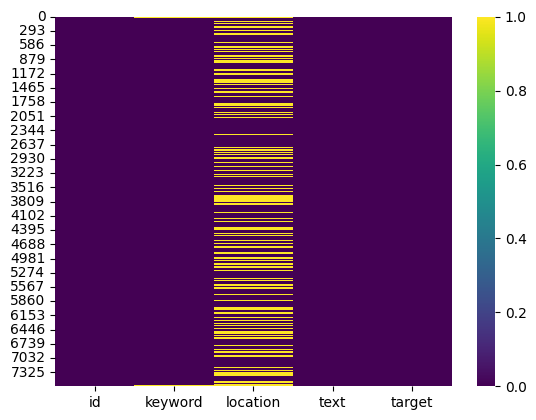

Training Set Shape after clean up = (7613, 5)
Test Set Shape after clean up = (3263, 4)


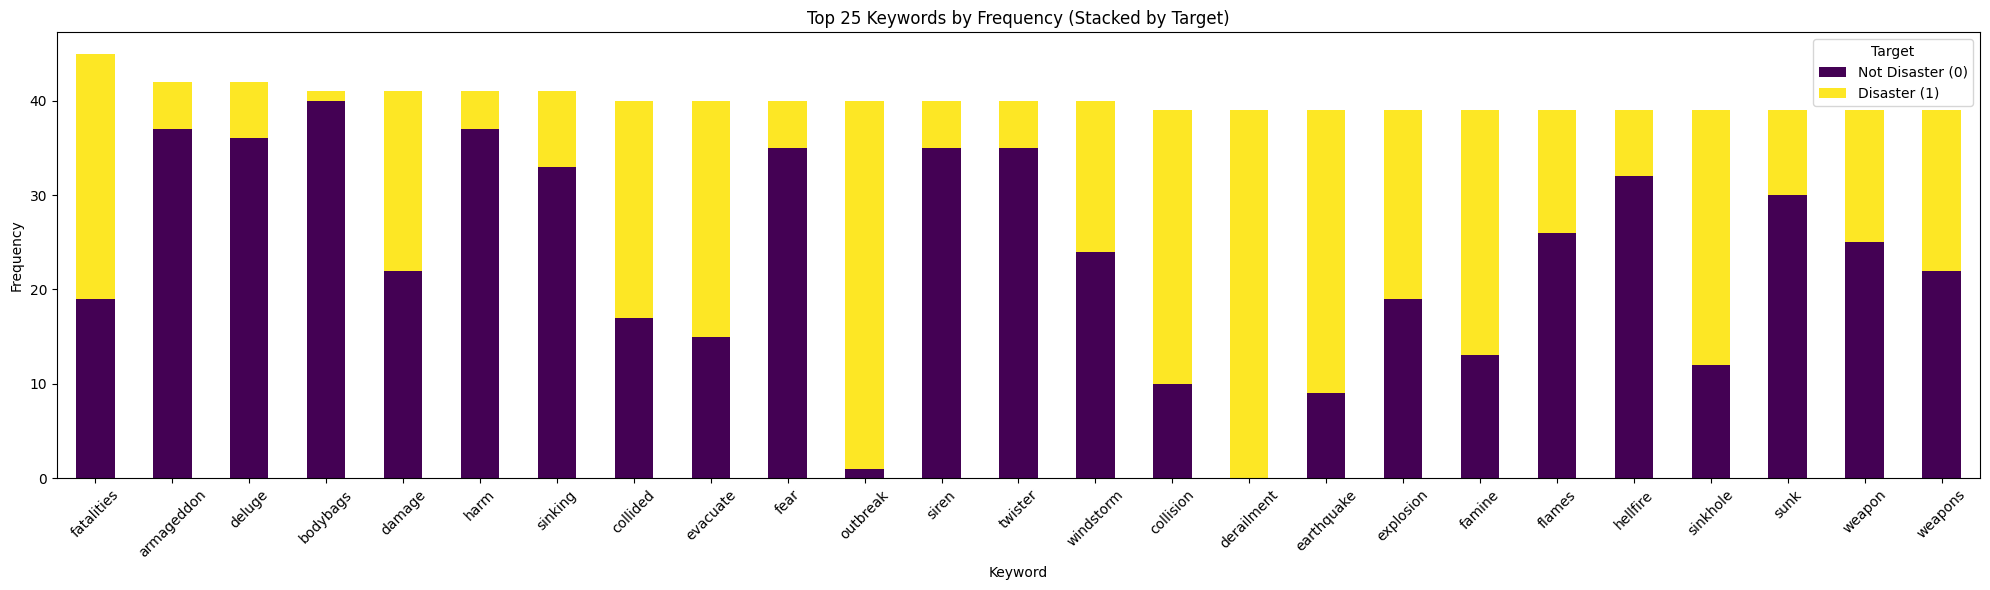

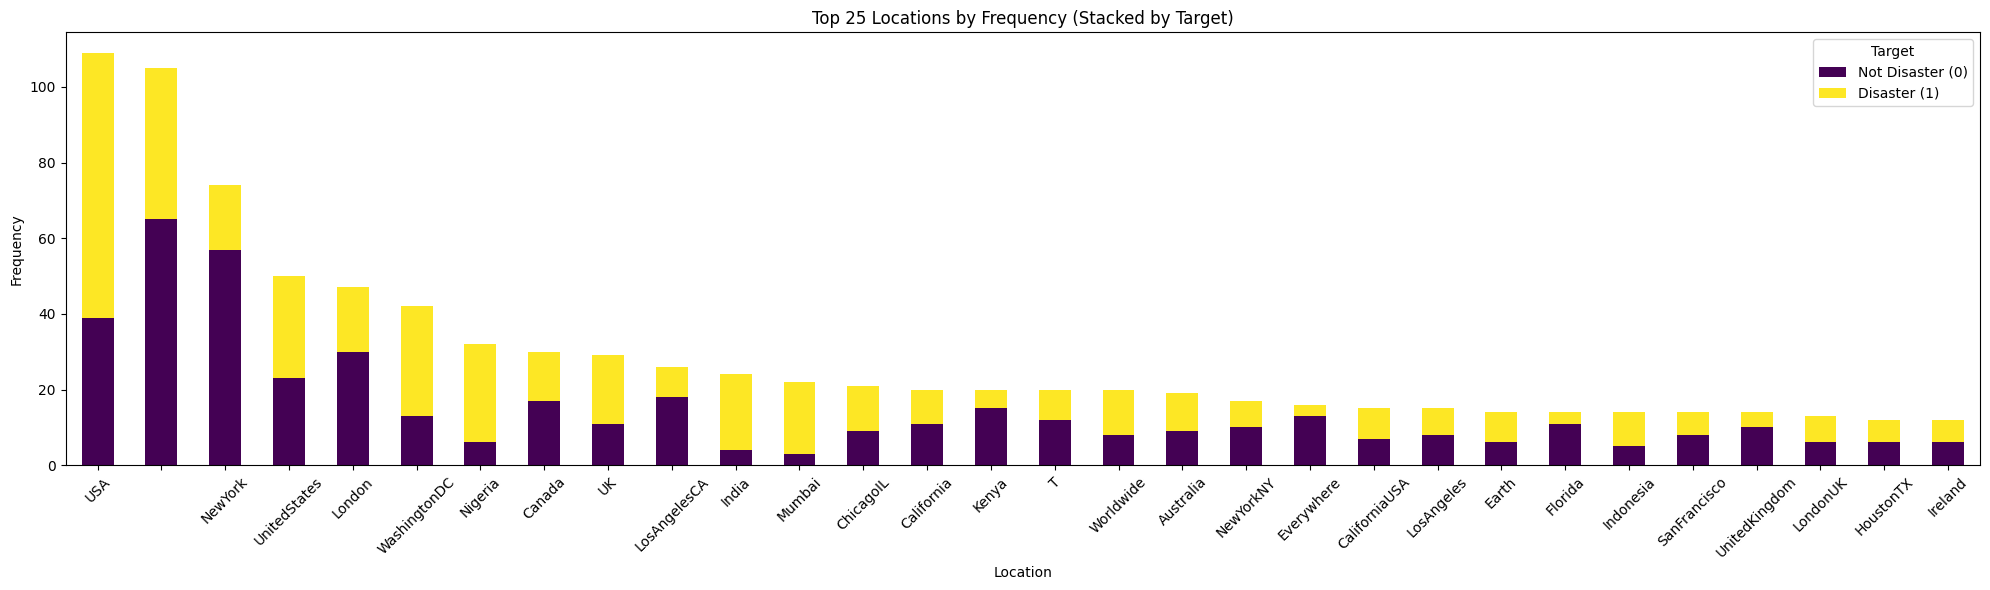

Train Length Stat
count    7613.000000
mean      101.037436
std        33.781325
min         7.000000
25%        78.000000
50%       107.000000
75%       133.000000
max       157.000000
Name: length, dtype: float64

Test Length Stat
count    3263.000000
mean      102.108183
std        33.972158
min         5.000000
25%        78.000000
50%       109.000000
75%       134.000000
max       151.000000
Name: length, dtype: float64
0       [our, deeds, are, the, reason, of, this, earth...
1           [forest, fire, near, la, ronge, sask, canada]
2       [all, residents, asked, to, shelter, in, place...
3       [people, receive, wildfires, evacuation, order...
4       [just, got, sent, this, photo, from, ruby, ala...
                              ...                        
7608    [two, giant, cranes, holding, a, bridge, colla...
7609    [ariaahrary, thetawniest, the, out, of, contro...
7610    [m, utckm, s, of, volcano, hawaii, httptcozdto...
7611    [police, investigating, after, an, ebike

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import re

def clean_field(field):
    if pd.isna(field): 
        return None
    return re.sub(r"[^a-zA-Z]", "", field).strip()

def clean_text(text):
    if pd.isna(text):  
        return []
    # Convert to lowercase, remove special characters
    text = re.sub(r"[^a-zA-Z\s]", "", text.lower())
    return text

# check null values
print(df_train.info())
print(df_test.info())
print(f"the number of null values in train.csv:" , df_train.isnull().sum())
print(f"the number of null values in test.csv:" , df_test.isnull().sum())
sns.heatmap(df_train.isnull(), cbar=True, cmap='viridis')
plt.show()

# Remove rows with missing target in train
train_cleaned = df_train.dropna(subset=['target'])

# Remove rows with missing and duplicated texts
df_train.drop_duplicates(inplace=True)
df_test.drop_duplicates(inplace=True)

print('Training Set Shape after clean up = {}'.format(df_train.shape))
print('Test Set Shape after clean up = {}'.format(df_test.shape))

# Clean `keyword` and `location` columns
df_train["keyword"] = df_train["keyword"].apply(clean_field)
df_train["location"] = df_train["location"].apply(clean_field)


# Show top 25 keywords &  locationss
df_train_filtered_keyword = df_train.dropna(subset=["keyword"])
keyword_freq = df_train_filtered_keyword.groupby(["keyword", "target"]).size().unstack(fill_value=0)
keyword_freq['total'] = keyword_freq.sum(axis=1)
top_keywords = keyword_freq.nlargest(25, "total").drop(columns=["total"])


top_keywords.plot(kind="bar", stacked=True, figsize=(20, 6), colormap="viridis")
plt.title("Top 25 Keywords by Frequency (Stacked by Target)")
plt.xlabel("Keyword")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.legend(["Not Disaster (0)", "Disaster (1)"], title="Target")
plt.tight_layout()
plt.show()


df_train_filtered_location = df_train.dropna(subset=["location"])
keyword_freq = df_train_filtered_location.groupby(["location", "target"]).size().unstack(fill_value=0)
keyword_freq['total'] = keyword_freq.sum(axis=1)
top_keywords = keyword_freq.nlargest(30, "total").drop(columns=["total"])


top_keywords.plot(kind="bar", stacked=True, figsize=(20, 6), colormap="viridis")
plt.title("Top 25 Locations by Frequency (Stacked by Target)")
plt.xlabel("Location")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.legend(["Not Disaster (0)", "Disaster (1)"], title="Target")
plt.tight_layout()
plt.show()

# Show length of texts
df_train["length"] = df_train["text"].apply(lambda x : len(x))
df_test["length"] = df_test["text"].apply(lambda x : len(x))

print("Train Length Stat")
print(df_train["length"].describe())
print()

print("Test Length Stat")
print(df_test["length"].describe())

df_train["clean_text"] = df_train["text"].apply(clean_text)



Step 3: Model Architecture


This link ***https://www.kaggle.com/code/alexia/kerasnlp-starter-notebook-disaster-tweets*** provides a friendly introduction about training RNN.
1. The model is DistillBert. Bert stands for Bidirectional Encoder Representations from Transformers. DistillBert is a smaller and more efficient version of BERT. They both use ***Transformer Architecture***. The transformer architecture uses self-attention (weighing the importance of each word (token) in a sequence relative to other words in the sequence), multi-head attention (focusing on different parts of the sequence at once), and positional encodings (adding the information about the position of words in the sequence) to understand the context of words in a sequence, allowing it to capture complex relationships in language. DistillBert reduces needed computational resources and size but meanwhile still keeps higher accuracy (slightly less than BERT). 
2. DistillBert has a processor DistilBertPreprocessor. Compared to traditional processor methods such as TF-IDF, Word2Vec, or GloVe, DistilBertPreprocessor generates contextual embeddings. Rather than generating a static value for each word, DistilBertPreprocessor can generate dynamic vectors based on the context. Traditional methods convert raw text into a sparse matrix representation using word frequency and inverse document frequency, while DistilBertPreprocessor tokenize and converting texts into format compatible with transformers.
3. Both Bert and DistillBert handle varying text lengths by applying padding to ensure similar lengths across inputs. The padding tokens are masked during processing to prevent them from influencing the model's output, thereby maintaining the accuracy of the model. Tuning is much easier.
4. The preset used here is "distilbert-base-uncased" which is not case sensitive. That said, in previous EDA step, I already lowercased the texts and did some clean-ups. Use sequence_length to ensure that all text sequences are processed to the same length, regardless of the original length of the text. Using a small number will also help shortening the training speed since I have limited CPU. The mean length of train and test texts are 103 words, so analyzing 10 words each time should not affect the context too much.



In [ ]:
import os
from sklearn.model_selection import train_test_split
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import tensorflow as tf
import keras_core as keras
import keras_nlp
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

os.environ['KERAS_BACKEND'] = 'tensorflow'

BATCH_SIZE = 32
VAL_SPLIT = 0.2
EPOCHS = 5

AUTO = tf.data.experimental.AUTOTUNE

X = df_train["clean_text"]
y = df_train["target"]

# Divide the train dataset, 80% for training and 20% for test
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=VAL_SPLIT, random_state=42)


# Load a DistilBERT model.
preset= "distil_bert_base_en_uncased"

# Use a shorter sequence length 10.
preprocessor = keras_nlp.models.DistilBertPreprocessor.from_preset(preset,
                                                                   sequence_length=10,
                                                                   name="preprocessor_4_tweets"
                                                                  )

# Pretrained classifier.
classifier = keras_nlp.models.DistilBertClassifier.from_preset(preset,
                                                               preprocessor = preprocessor,
                                                               num_classes=2)

classifier.summary()


classifier.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), #'binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(1e-5),
    metrics= ["accuracy"]
)

early_stop = EarlyStopping(
    monitor="val_accuracy",
    patience=1,  # Stop if no improvement for 1 epochs
    restore_best_weights=True,  # Restore the best weights after stopping
    min_delta=0.01
)

checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Colab Notebooks/best_model_nlp.keras',  # File path to save the model
    monitor='val_loss',  # Metric to monitor
    save_best_only=False,  # Only save the model when the validation loss improves
    save_weights_only=False,  # Save the entire model (not just the weights)
    verbose=1  
)

# Fit
history = classifier.fit(x=X_train,
                         y=y_train,
                         batch_size=BATCH_SIZE,
                         epochs=EPOCHS,
                         callbacks=[early_stop, checkpoint],
                         validation_data=(X_val, y_val)
                        )




Step 4: Results and Analysis

After the previous step, the accuracy and loss metrics showed a peak accuracy of 0.8446 and a peak validation accuracy of 0.7794. To improve the model's performance, the following adjustments were made:

  1. The early stopping criterion was changed to monitor validation accuracy.
  2. The batch size was increased to 64.
  3. Use another method to clean methods to keep more special symbols

Next, we selected the top three models to run K-Fold cross-validation, followed by confusion matrix analysis, accuracy score, and a classification report. A summary of the model performance is provided below.

Model 3 was used for the final submission, achieving an accuracy of 0.77566, which shows only a marginal improvement.

***Model Performance Summary***
```python
Model 1:
  Accuracy: 0.82
  Classification Report:
{'0': {'precision': 0.7872299382716049, 'recall': 0.9398894518654998, 'f1-score': 0.8568129330254042, 'support': 4342.0}, '1': {'precision': 0.8925483738163853, 'recall': 0.6627942525221645, 'f1-score': 0.7607017543859649, 'support': 3271.0}, 'accuracy': 0.8208327860239065, 'macro avg': {'precision': 0.8398891560439952, 'recall': 0.8013418521938321, 'f1-score': 0.8087573437056845, 'support': 7613.0}, 'weighted avg': {'precision': 0.8324810354300151, 'recall': 0.8208327860239065, 'f1-score': 0.8155178239580712, 'support': 7613.0}}
----------------------------------------
Model 2:
  Accuracy: 0.83
  Classification Report:
{'0': {'precision': 0.8128068739770867, 'recall': 0.915016121602948, 'f1-score': 0.8608884073672806, 'support': 4342.0}, '1': {'precision': 0.8645871559633027, 'recall': 0.7202690308774076, 'f1-score': 0.7858572381587725, 'support': 3271.0}, 'accuracy': 0.8313411270195717, 'macro avg': {'precision': 0.8386970149701947, 'recall': 0.8176425762401778, 'f1-score': 0.8233728227630266, 'support': 7613.0}, 'weighted avg': {'precision': 0.8350547791888183, 'recall': 0.8313411270195717, 'f1-score': 0.8286505307771019, 'support': 7613.0}}
----------------------------------------
Model 3:
  Accuracy: 0.84
  Classification Report:
{'0': {'precision': 0.8179975678962302, 'recall': 0.9295255642561032, 'f1-score': 0.8702026735661923, 'support': 4342.0}, '1': {'precision': 0.8857782754759238, 'recall': 0.725466218281871, 'f1-score': 0.7976470588235294, 'support': 3271.0}, 'accuracy': 0.8418494680152371, 'macro avg': {'precision': 0.8518879216860771, 'recall': 0.8274958912689871, 'f1-score': 0.8339248661948608, 'support': 7613.0}, 'weighted avg': {'precision': 0.8471202126477313, 'recall': 0.8418494680152371, 'f1-score': 0.8390284431940328, 'support': 7613.0}}
```
----------------------------------------

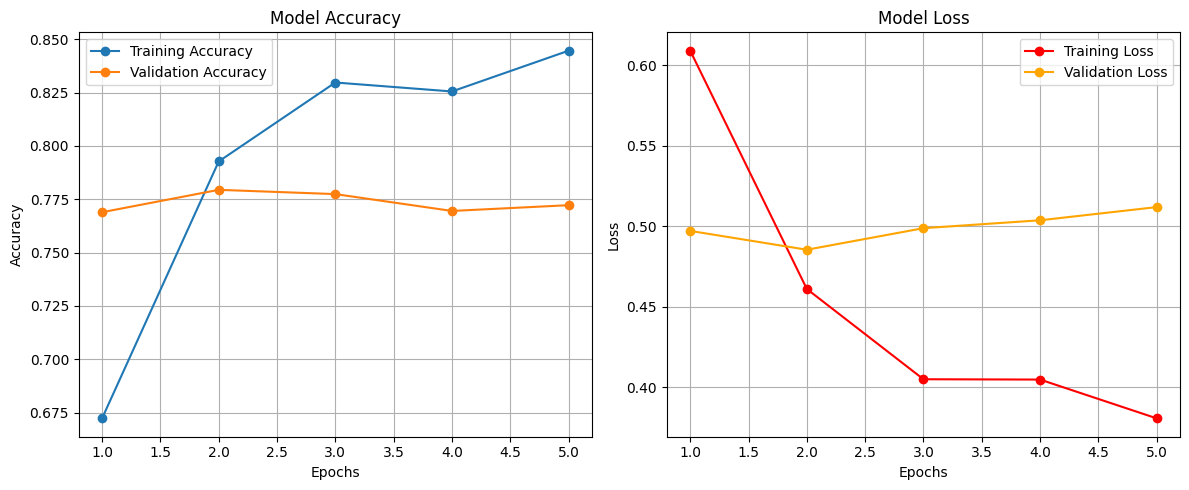

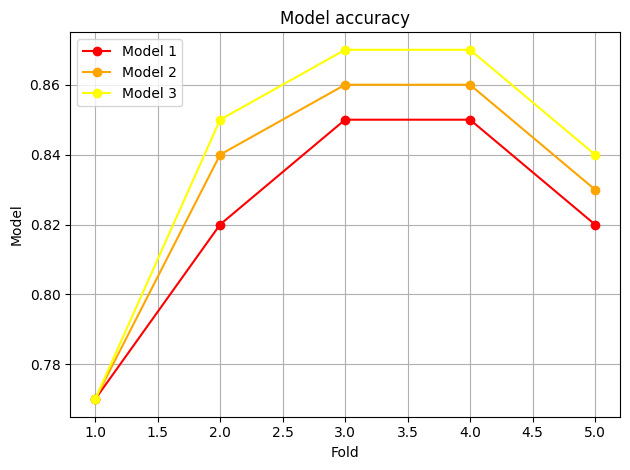

NameError: name 'load_model' is not defined

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import numpy as np

# Text cleaning function that keeps more features
def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove links, remove punctuation,
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    return text


# first epoch round
accuracy_list = [0.6723, 0.7927, 0.8297, 0.8255, 0.8446]
loss_list = [0.6091, 0.4610, 0.4049, 0.4047, 0.3806]
val_accuracy_list = [0.7689, 0.7794, 0.7774, 0.7695, 0.7722]
val_loss = [0.4971, 0.4854, 0.4988, 0.5037, 0.5119]

epochs = range(1, 6)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy_list, label="Training Accuracy", marker='o')
plt.plot(epochs, val_accuracy_list, label="Validation Accuracy", marker='o')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss_list, label="Training Loss", marker='o', color='red')
plt.plot(epochs, val_loss, label="Validation Loss", marker='o', color='orange')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

#Tune the parameters and train again

early_stop = EarlyStopping(
    monitor="val_accuracy",
    patience=1,  # Stop if no improvement for 1 epochs
    restore_best_weights=True,  # Restore the best weights after stopping
    min_delta=0.01
)

checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Colab Notebooks/best_model_nlp_2_epoch_{epoch:02d}_val_loss_{val_loss:.2f}.keras', 
    monitor='val_loss', 
    save_best_only=False,  
    save_weights_only=False,  
    verbose=1  
)


history = classifier.fit(
    x=X_train,
    y=y_train,
    batch_size=64,  # Adjusted batch size
    epochs=5,  # Specify remaining epochs
    callbacks=[early_stop, checkpoint],
    validation_data=(X_val, y_val),
)

plt.plot(epochs, model_1_fold_accuracy, label="Model 1", marker='o', color='red')
plt.plot(epochs, model_2_fold_accuracy, label="Model 2", marker='o', color='orange')
plt.plot(epochs, model_3_fold_accuracy, label="Model 3", marker='o', color='yellow')
plt.title("Model accuracy")
plt.xlabel("Fold")
plt.ylabel("Model")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()



# Load 3 models
model_1 = load_model("/content/drive/MyDrive/Colab Notebooks/best_model_nlp_epoch_02_val_loss_0.50.keras")
model_2 = load_model("/content/drive/MyDrive/Colab Notebooks/best_model_nlp_2_epoch_01_val_loss_0.50.keras")
model_3 = load_model("/content/drive/MyDrive/Colab Notebooks/best_model_nlp_2_epoch_02_val_loss_0.51.keras")
models = {
    "Model 1": model_1,
    "Model 2": model_2,
    "Model 3": model_3
}


# Preprocess data
df_train["cleaned_text"] = df_train["text"].apply(clean_text)

X = df_train["cleaned_text"].values  # Convert to NumPy array
y = df_train["target"].values  # Convert to NumPy array

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store results for comparison
model_results = {}

for model_name, model in models.items():
    print(f"\nEvaluating {model_name}")
    fold_accuracies = []
    all_y_true = []
    all_y_pred = []

    # Perform K-Fold Cross-Validation
    for fold, (train_idx, test_idx) in enumerate(kf.split(X)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        # Preprocess text using the tokenizer (replace with your tokenizer)
        X_train = np.array([clean_text(text) for text in X_train])
        X_test = np.array([clean_text(text) for text in X_test])

        # Predict
        y_pred_probs = model.predict(X_test)  # Predicted probabilities
        y_pred = np.argmax(y_pred_probs, axis=1) if y_pred_probs.ndim > 1 else (y_pred_probs > 0.5).astype(int)

        # Store results
        all_y_true.extend(y_test)
        all_y_pred.extend(y_pred)

        # Calculate fold accuracy
        fold_accuracy = accuracy_score(y_test, y_pred)
        fold_accuracies.append(fold_accuracy)
        print(f"  Fold {fold + 1}: Accuracy = {fold_accuracy:.2f}")

    model_accuracy = np.mean(fold_accuracies)
    model_results[model_name] = {
        "accuracy": model_accuracy,
        "confusion_matrix": confusion_matrix(all_y_true, all_y_pred),
        "classification_report": classification_report(all_y_true, all_y_pred, output_dict=True)
    }
    print(f"  {model_name} Average Accuracy: {model_accuracy:.2f}")

    cm = confusion_matrix(all_y_true, all_y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

# Compare model performances
print("\nModel Performance Summary:")
for model_name, results in model_results.items():
    print(f"{model_name}:")
    print(f"  Accuracy: {results['accuracy']:.2f}")
    print(f"  Classification Report:")
    print(results['classification_report'])
    print("-" * 40)

# compare the 3 chosen models with K-Fold
model_1_fold_accuracy = [0.77, 0.82, 0.85, 0.85, 0.82]
model_2_fold_accuracy = [0.77, 0.84, 0.86, 0.86, 0.83]
model_3_fold_accuracy = [0.77, 0.85, 0.87, 0.87, 0.84]


df_test["cleaned_text"] = df_test["text"].apply(clean_text)
X_test = df_test["text"].apply(clean_text)
best_model = model_3
y_pred_probs = best_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1) if y_pred_probs.ndim > 1 else (y_pred_probs > 0.5).astype(int)
df_test["target"] = y_pred

output_path = "/content/drive/MyDrive/Colab Notebooks/nlp/output.csv"
df_test[["id", "target"]].to_csv(output_path, index=False)
reloaded_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/nlp/output.csv")
print(f"Number of rows in the saved CSV file: {len(reloaded_df)}")



<img src="resources/confusion_matrix_model_1.png"> \
<img src="resources/confusion_matrix_model_2.png"> \
<img src="resources/confusion_matrix_model_3.png">

Step 5: Conclusion

The experiments conducted with various model configurations yielded an accuracy of ***0.77566*** for Model 3, which shows a slight improvement compared to previous results. While the changes made, such as adjusting the early stopping criterion and increasing the batch size, helped in refining the model, the overall performance still leaves room for improvement.

1. Incorporate Relevant Keywords: Some keywords are highly correlated with specific labels. Adding these high-relevance words can enhance the model's ability to make accurate predictions. 

2. Tune Hyperparameters: Experiment with adjusting sequence lengths and epoch steps to determine if performance improvements can be achieved. 

3. Refine Model Architecture: Explore more complex network structures or try different supervised learning models to see if they give better results.

Reference List \
https://www.kaggle.com/code/parthplc/distill-bert-for-classification \
https://www.kaggle.com/code/sahib12/distill-bert-for-beginners \
https://www.kaggle.com/code/alexia/kerasnlp-starter-notebook-disaster-tweets